In [13]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing 
from matplotlib import pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.colors as mcolors

In [14]:
dataFrame=pd.read_csv('creditcard.csv')

In [15]:
dataFrame.info()

# Class is target Variable while all others are features (dependent variables)
# datafram contains 30 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
dataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
#Preprocessing
    # Preprocessing the dataset is a very important part of the analysis, 
    # it is used to remove outliers and duplicates from the dataset.
sum(dataFrame.duplicated())
# we have to remove 1081 duplicate rows

1081

In [18]:
dataFrame.drop_duplicates(inplace=True)
sum(dataFrame.duplicated())

0

In [19]:
#Drop unnecessary columns
dataFrame.drop('Time', axis=1, inplace=True)

In [20]:
#Now the data has been cleaned, the dataset columns can be separated into feature columns(dependents) and target column(independent).

x=dataFrame.iloc[:, dataFrame.columns != 'Class'] # dependent vars
y=dataFrame.Class                                 # independent var

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

"""
stratify parameter makes a split so that the proportion of values in the sample produced
will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
"""

"\nstratify parameter makes a split so that the proportion of values in the sample produced\nwill be the same as the proportion of values provided to parameter stratify.\n\nFor example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.\n"

In [38]:
"""
Data set where the data points or features values have high differences with each other will take more 
time to understand the data and the accuracy will be lower. Larger differences between the data points 
of input variables increase the uncertainty in the results of the model. 

Scaling is a technique to make data points closer to each other.
"""
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)
y_pred = model.predict(x_test_scaled)

"""
Preprocessing determines the success or failure of analysis and therefore should be down carefully. 
Various other things are done during the preprocessing stage depending on the type and nature of data.
"""

'\nPreprocessing determines the success or failure of analysis and therefore should be down carefully. \nVarious other things are done during the preprocessing stage depending on the type and nature of data.\n'

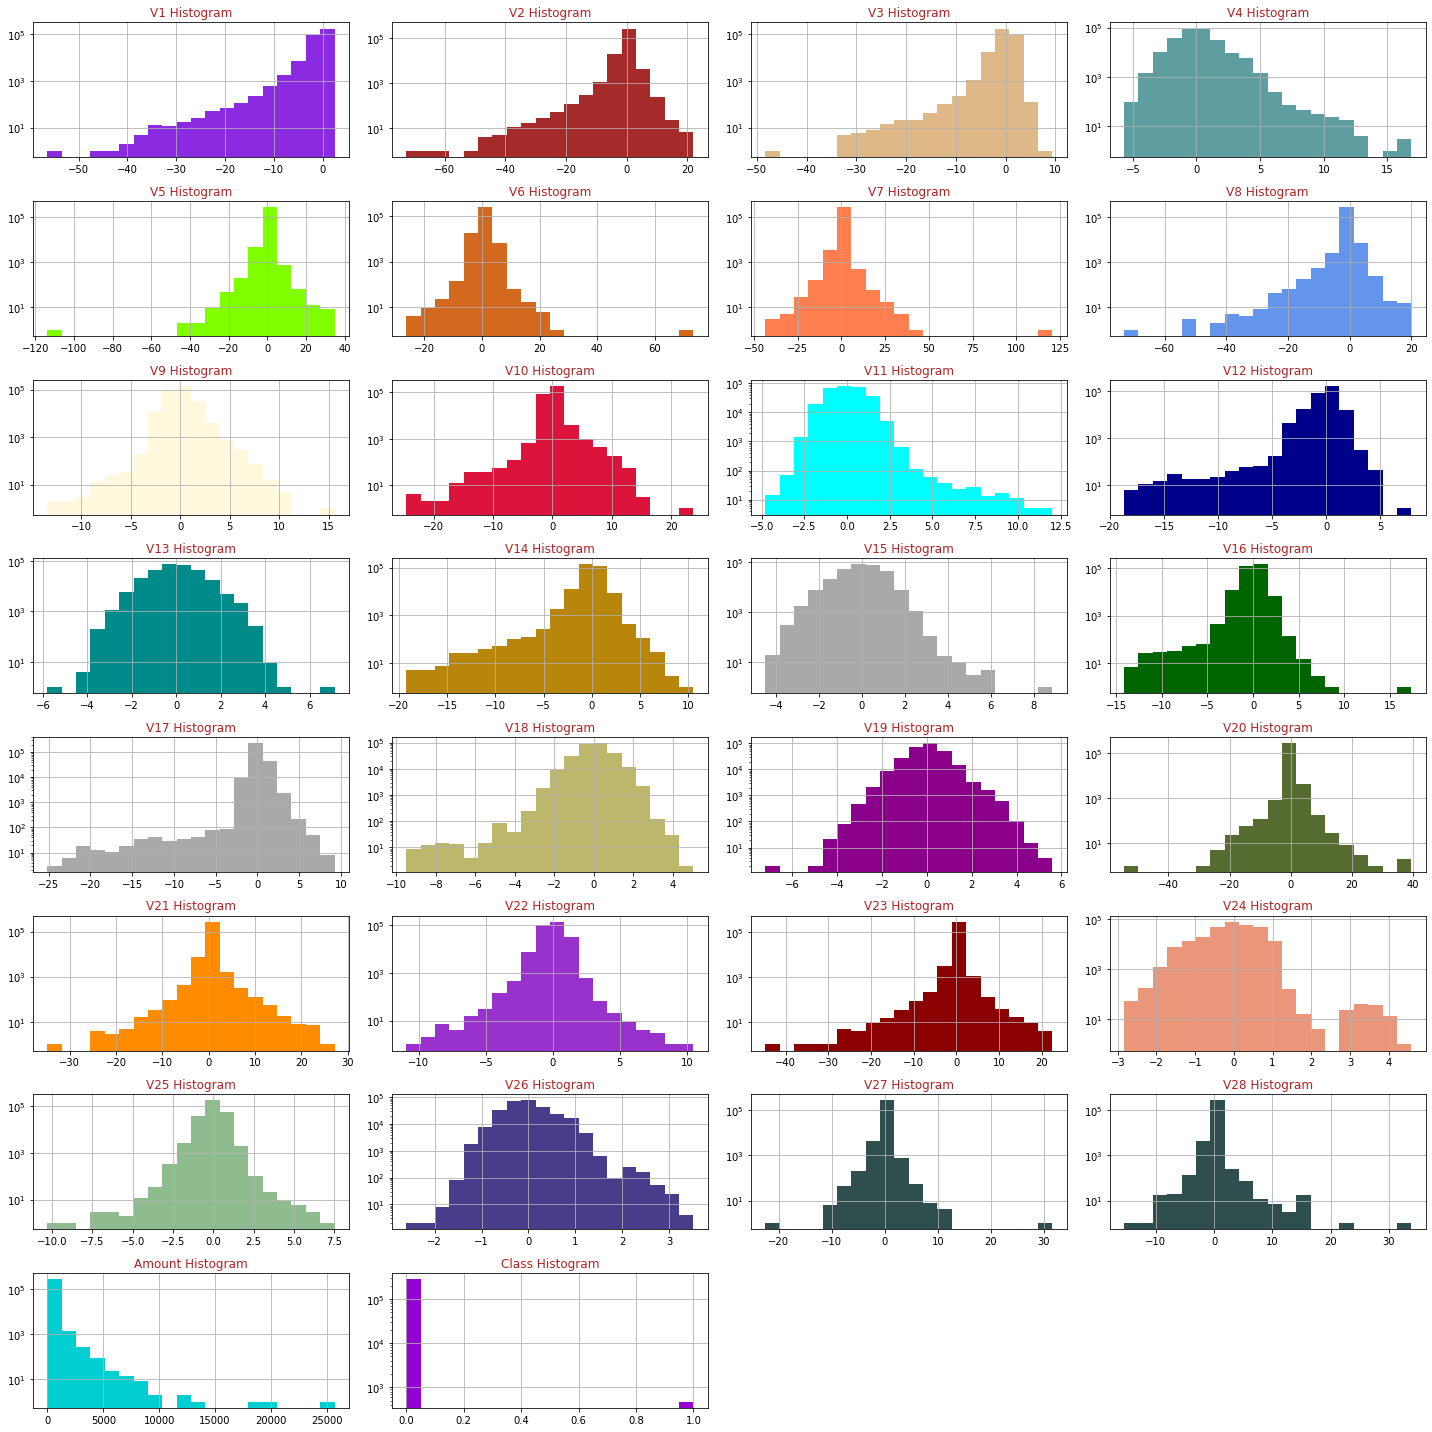

In [23]:
# EXPLORATORY DATA VISUALIZATION
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plot.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plot.show()
draw_histograms(dataFrame,dataFrame.columns,8,4)

In [24]:
#model building and training
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [29]:
train_accuracy=model.score(x_train_scaled, y_train)
print("Accuracy for training set is {} %".format(train_accuracy*100))
#Training accuracy is not that useful, test accuracy is the real metric of success.

Accuracy for training set is 99.92642523570359 %


In [40]:
test_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy for testing set is {} %".format(test_accuracy*100))

Accuracy for testing set is 99.92069925633524 %


In [42]:
#classifiaction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.65      0.73        95

    accuracy                           1.00     56746
   macro avg       0.92      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 33.0, 'Predicted Values')

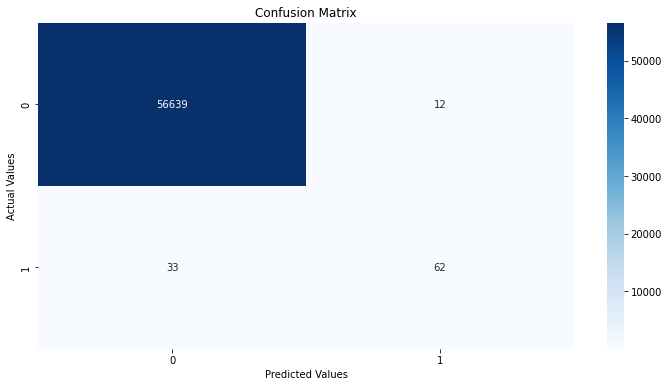

In [47]:
cm=confusion_matrix(y_test,y_pred)
plot.figure(figsize=(12,6))
plot.title("Confusion Matrix")
sb.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plot.ylabel("Actual Values")
plot.xlabel("Predicted Values")